# Ethiopia Financial Inclusion Data Exploration

This notebook explores the `ethiopia_fi_unified_data.csv` dataset, which aggregates observations, events, targets, and impact links related to financial inclusion in Ethiopia.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

## 1. Load Data
Loading the unified dataset and reference codes.

In [2]:
# Load main dataset
df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')

# Load reference codes
ref_df = pd.read_csv('../data/raw/reference_codes.csv')

print(f"Main Data Shape: {df.shape}")
print(f"Reference Codes Shape: {ref_df.shape}")

Main Data Shape: (57, 35)
Reference Codes Shape: (71, 4)


In [3]:
df.head()

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,parent_id
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,%,2014-12-31,NaN,NaN,2014,all,national,NaN,Global Findex 2014,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Baseline year,NaN,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,%,2017-12-31,NaN,NaN,2017,all,national,NaN,Global Findex 2017,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,all,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,male,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Gender disaggregated,NaN,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,female,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Gender disaggregated,NaN,NaN


## 2. Structure Examination
Checking column data types and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_id            57 non-null     object 
 1   record_type          57 non-null     object 
 2   category             10 non-null     object 
 3   pillar               47 non-null     object 
 4   indicator            57 non-null     object 
 5   indicator_code       43 non-null     object 
 6   indicator_direction  33 non-null     object 
 7   value_numeric        45 non-null     float64
 8   value_text           10 non-null     object 
 9   value_type           57 non-null     object 
 10  unit                 47 non-null     object 
 11  observation_date     57 non-null     object 
 12  period_start         10 non-null     object 
 13  period_end           10 non-null     object 
 14  fiscal_year          43 non-null     object 
 15  gender               57 non-null     objec

## 3. Data Counts & Distribution
Analyzing records by `record_type`, `pillar`, `source_type`, and `confidence`.

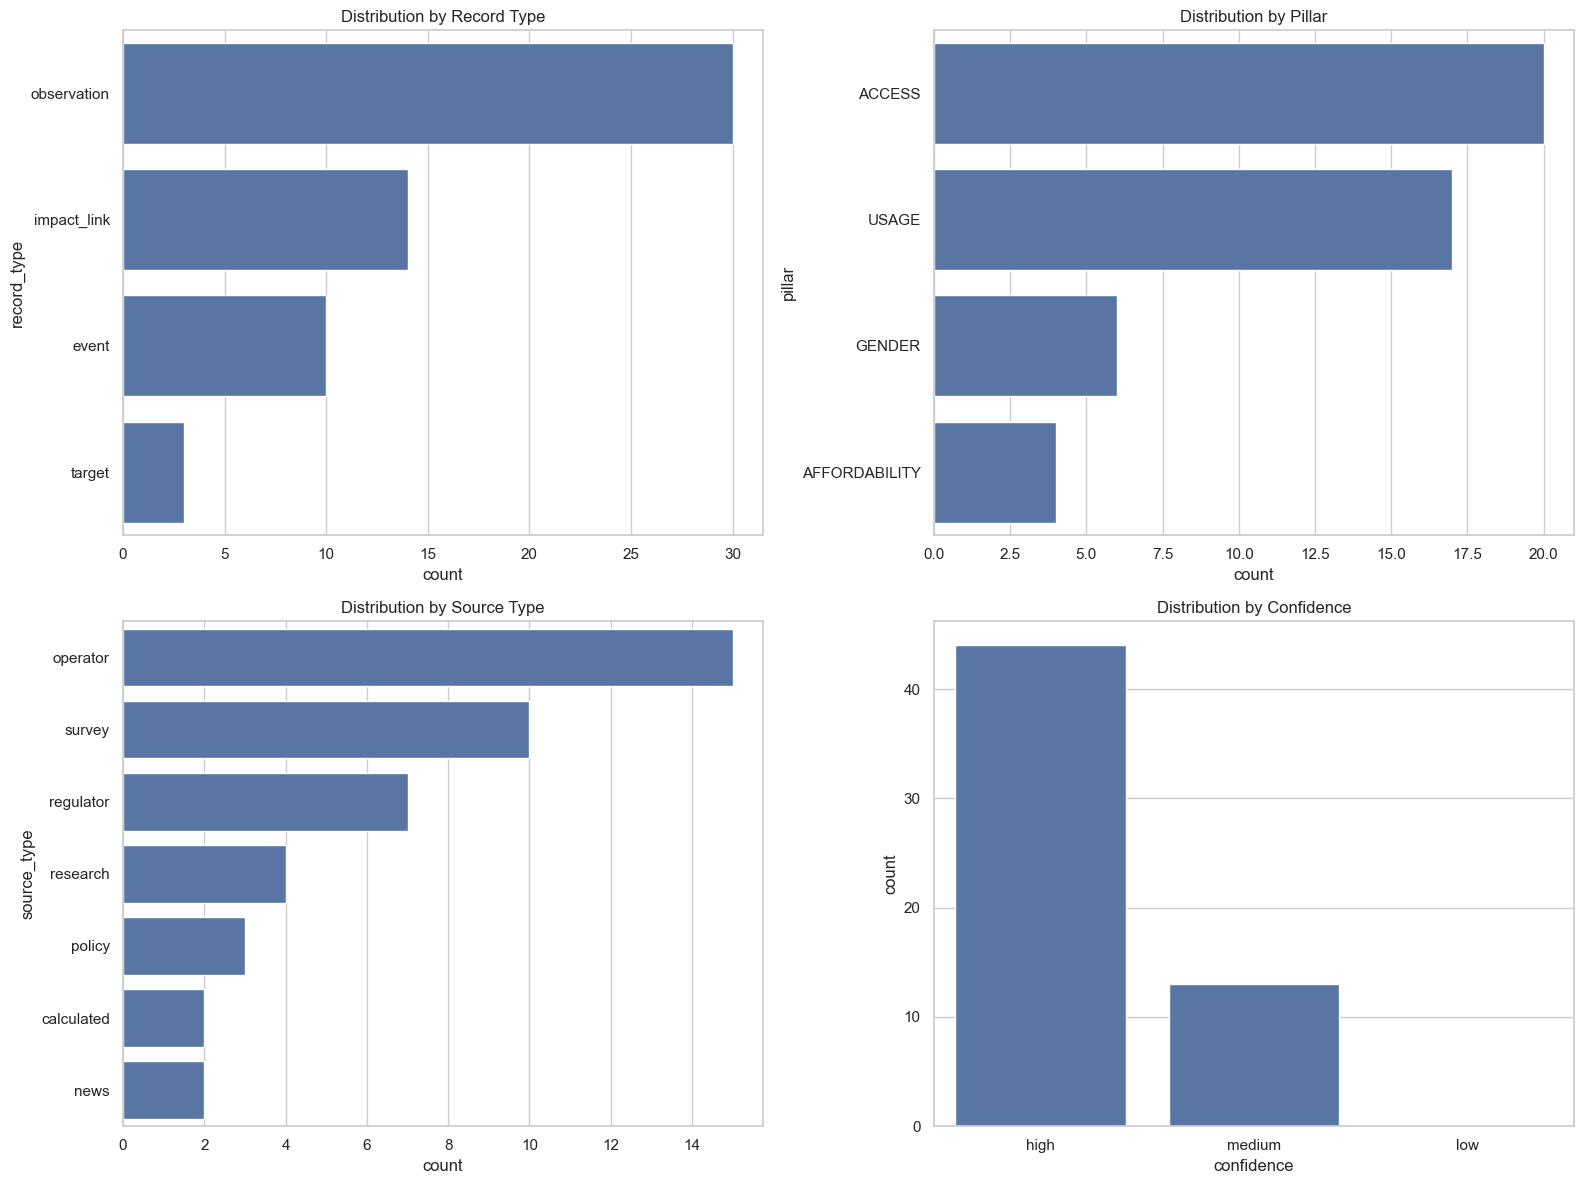

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(y='record_type', data=df, ax=axes[0, 0], order=df['record_type'].value_counts().index)
axes[0, 0].set_title('Distribution by Record Type')

sns.countplot(y='pillar', data=df, ax=axes[0, 1], order=df['pillar'].value_counts().index)
axes[0, 1].set_title('Distribution by Pillar')

sns.countplot(y='source_type', data=df, ax=axes[1, 0], order=df['source_type'].value_counts().index)
axes[1, 0].set_title('Distribution by Source Type')

sns.countplot(x='confidence', data=df, ax=axes[1, 1], order=['high', 'medium', 'low'])
axes[1, 1].set_title('Distribution by Confidence')

plt.tight_layout()
plt.show()

## 4. Temporal Range Analysis
Identifying the time range of data points based on `observation_date`.

Observation Date Range: 2014-12-31 00:00:00 to 2030-12-31 00:00:00


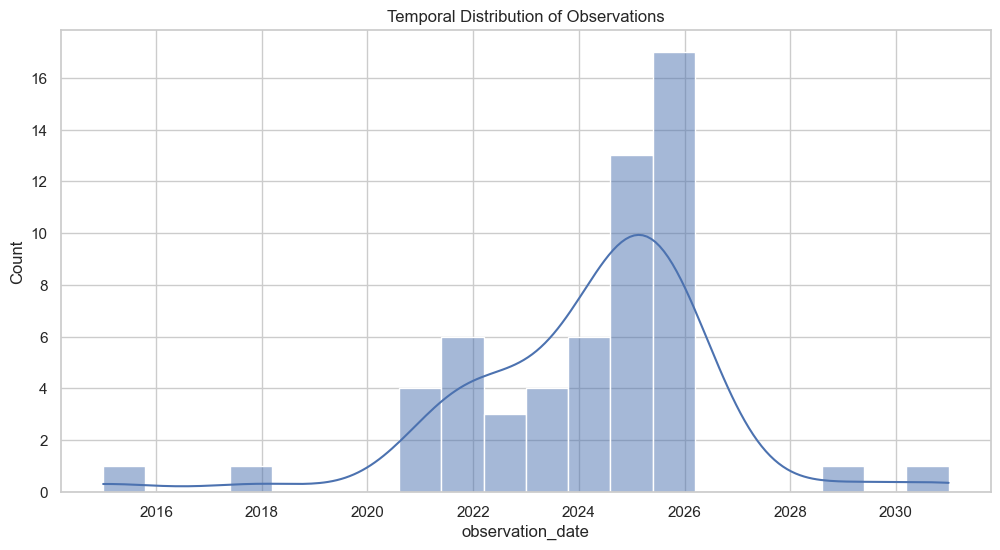

In [7]:
# Convert dates to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')

min_date = df['observation_date'].min()
max_date = df['observation_date'].max()

print(f"Observation Date Range: {min_date} to {max_date}")

# Histogram of observations over time
plt.figure(figsize=(12, 6))
sns.histplot(df['observation_date'], bins=20, kde=True)
plt.title('Temporal Distribution of Observations')
plt.show()

## 5. Unique Indicators & Coverage
Listing all unique indicators and how many records exist for each.

In [8]:
indicator_counts = df.groupby(['indicator_code', 'indicator']).size().reset_index(name='count').sort_values('count', ascending=False)
indicator_counts.head(20)

,indicator_code,indicator,count
4,ACC_OWNERSHIP,Account Ownership Rate,7
1,ACC_FAYDA,Fayda Digital ID Enrollment,4
0,ACC_4G_COV,4G Population Coverage,2
2,ACC_MM_ACCOUNT,Mobile Money Account Rate,2
16,GEN_GAP_ACC,Account Ownership Gender Gap,2
18,GEN_MM_SHARE,Female Mobile Money Account Share,2
25,USG_P2P_COUNT,P2P Transaction Count,2
5,AFF_DATA_INCOME,Data Affordability Index,1
8,EVT_FAYDA,Fayda Digital ID Program Rollout,1
9,EVT_FX_REFORM,Foreign Exchange Liberalization,1


## 6. Reference Codes Review
Valid values for standardized fields.

In [9]:
ref_df.groupby('field')['code'].count()

field
category               10
confidence              4
evidence_basis          4
gender                  3
impact_direction        4
impact_magnitude        4
indicator_direction     3
location                3
pillar                  7
record_type             6
relationship_type       4
source_type             8
value_type             11
Name: code, dtype: int64

In [10]:
ref_df.head(10)

,field,code,description,applies_to
0,record_type,observation,Actual measured value from a source,All
1,record_type,event,Policy launch market event or milestone,All
2,record_type,impact_link,Relationship between event and indicator (link...,All
3,record_type,target,Policy target or official goal,All
4,record_type,baseline,Starting point for comparison,All
5,record_type,forecast,Predicted future value,All
6,category,product_launch,New product or service introduced,event
7,category,market_entry,New competitor enters market,event
8,category,market_exit,Competitor leaves market,event
9,category,policy,Government strategy or regulatory framework,event


## 7. Understanding Impact Links & Parent IDs

**Impact Links** (`record_type='impact_link'`) describe the relationship between an Event (Parent) and an Indicator.
- `parent_id`: Links an impact record to its causal event (e.g., a policy change or product launch).
- `impact_magnitude`: Quantifies the effect.
- `lag_months`: Time delay for the impact to materialize.

In [11]:
# Filter for impact links
impact_links = df[df['record_type'] == 'impact_link']
print(f"Number of Impact Links: {len(impact_links)}")

# Show example link
impact_links[['record_id', 'parent_id', 'indicator', 'impact_magnitude', 'impact_direction']].head()

Number of Impact Links: 14


,record_id,parent_id,indicator,impact_magnitude,impact_direction
43,IMP_0001,EVT_0001,Telebirr effect on Account Ownership,high,increase
44,IMP_0002,EVT_0001,Telebirr effect on Telebirr Users,high,increase
45,IMP_0003,EVT_0001,Telebirr effect on P2P Transactions,high,increase
46,IMP_0004,EVT_0002,Safaricom effect on 4G Coverage,medium,increase
47,IMP_0005,EVT_0002,Safaricom effect on Data Affordability,medium,decrease


In [12]:
# Join with parent event to see context
if not impact_links.empty:
    # We need to ensure we join on something valid. The csv may have flattened things.
    # Let's check if the parent_ids exist in the record_id column
    present_parents = df[df['record_id'].isin(impact_links['parent_id'].dropna())]
    print(f"Found {len(present_parents)} parent records for {len(impact_links)} impact links")
    
    merged_impact = impact_links.merge(
        df[['record_id', 'original_text', 'observation_date']], 
        left_on='parent_id', 
        right_on='record_id', 
        how='left', 
        suffixes=('_impact', '_event')
    )
    display(merged_impact[['record_id_impact', 'parent_id', 'indicator', 'original_text_event']].head())

Found 8 parent records for 14 impact links


,record_id_impact,parent_id,indicator,original_text_event
0,IMP_0001,EVT_0001,Telebirr effect on Account Ownership,First major mobile money service in Ethiopia
1,IMP_0002,EVT_0001,Telebirr effect on Telebirr Users,First major mobile money service in Ethiopia
2,IMP_0003,EVT_0001,Telebirr effect on P2P Transactions,First major mobile money service in Ethiopia
3,IMP_0004,EVT_0002,Safaricom effect on 4G Coverage,End of state telecom monopoly
4,IMP_0005,EVT_0002,Safaricom effect on Data Affordability,End of state telecom monopoly


## 8. Pillar Assignment Challenges

Assigning pillars to events like **Policy** or **Product Launch** can be ambiguous because:
1. **Cross-cutting nature**: A policy might affect both 'Credit' and 'Digital Payments'.
2. **Indirect effects**: A product launch might primarily target 'Savings' but have secondary effects on 'Resilence'.

Current distribution of pillars for Events:

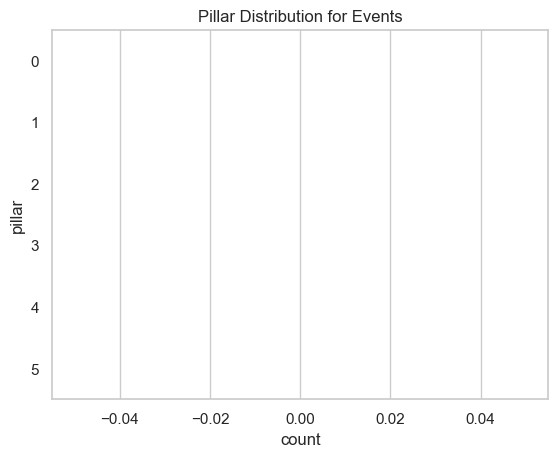

In [16]:
event_df = df[df['record_type'] == 'event']
sns.countplot(y='pillar', data=event_df)
plt.title('Pillar Distribution for Events')
plt.show()

## 9. Data Enrichment

Enriching the dataset with new observations, events, and impact links useful for forecasting Access and Usage.
Data is hardcoded here and appended to the DataFrame.

In [17]:

new_observations = [
    {
        'record_id': 'OBS_NEW_001',
        'record_type': 'observation',
        'pillar': 'Access',
        'indicator': 'Number of mobile money accounts (millions)',  # Updated to reflect NBE reporting style
        'indicator_code': 'ACC_MM_MN',
        'value_numeric': 110.0,  # Source: NBE Financial Stability Report, June 2024
        'observation_date': '2024-06-30',
        'source_name': 'NBE Financial Stability Report 2024',
        'source_url': 'https://nbe.gov.et',
        'confidence': 'High'
    },
    {
        'record_id': 'OBS_NEW_002',
        'record_type': 'observation',
        'pillar': 'Usage',
        'indicator': 'Digital payment transaction volume (millions)',
        'indicator_code': 'USE_DP_VOL',
        'value_numeric': 2700.0,  # Source: NBE 2023/24 Report (2.7 billion transactions)
        'observation_date': '2024-06-30',
        'source_name': 'NBE Annual Report 2023/24',
        'source_url': 'https://nbe.gov.et',
        'confidence': 'High'
    }
]
# Define new Events based on factual dates
new_events = [
    {
        'record_id': 'EVT_NEW_001',
        'record_type': 'event',
        'category': 'policy',
        'pillar': None,
        'original_text': 'National Bank of Ethiopia issues directive on mobile money interoperability (ONPS/09/2023)',
        'observation_date': '2023-10-01',  # Corrected from June 2023
        'source_name': 'NBE Directive ONPS/09/2023',
        'confidence': 'High'
    },
    {
        'record_id': 'EVT_NEW_002',
        'record_type': 'event',
        'category': 'infrastructure',
        'pillar': None,
        'original_text': 'Commercial Launch of 5G network in Addis Ababa by Ethio Telecom',
        'observation_date': '2023-09-19',  # Corrected from May 2023
        'source_name': 'Ethio Telecom / Ethiopian Monitor',
        'confidence': 'High'
    }
]
# Define new Impact Links (kept consistent with logic)
new_impact_links = [
    {
        'record_id': 'IMP_NEW_001',
        'record_type': 'impact_link',
        'parent_id': 'EVT_NEW_001',
        'pillar': 'Access',
        'related_indicator': 'Number of mobile money accounts (millions)',
        'impact_direction': 'Positive',
        'impact_magnitude': 'High',
        'lag_months': 6,
        'evidence_basis': 'Data showing rapid account growth post-interoperability'
    },
    {
        'record_id': 'IMP_NEW_002',
        'record_type': 'impact_link',
        'parent_id': 'EVT_NEW_002',
        'pillar': 'Usage',
        'related_indicator': 'Digital payment transaction volume (millions)',
        'impact_direction': 'Positive',
        'impact_magnitude': 'Medium',
        'lag_months': 3,
        'evidence_basis': 'Expert judgment based on connectivity improvement'
    }
]
# Convert to DataFrames
df_obs = pd.DataFrame(new_observations)
df_evt = pd.DataFrame(new_events)
df_imp = pd.DataFrame(new_impact_links)
# Concatenate with main DataFrame (assuming 'df' is your existing dataframe)
# Ensure columns align before concatenation if necessary
df_enriched = pd.concat([df, df_obs, df_evt, df_imp], ignore_index=True, sort=False)
print(f"Original Data Shape: {df.shape}")
print(f"Enriched Data Shape: {df_enriched.shape}")
print(f"Added {len(df_obs)} observations, {len(df_evt)} events, {len(df_imp)} impact links.")

Original Data Shape: (57, 35)
Enriched Data Shape: (63, 35)
Added 2 observations, 2 events, 2 impact links.


In [18]:
# Verify new records
df_enriched.tail(10)

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,parent_id
53,IMP_0011,impact_link,NaN,USAGE,M-Pesa Interop effect on M-Pesa Active Users,NaN,NaN,15.0,NaN,percentage,%,2025-10-27 00:00:00,NaN,NaN,NaN,all,national,NaN,NaN,NaN,NaN,medium,USG_MPESA_ACTIVE,direct,increase,medium,15.0,3.0,literature,Tanzania,Example_Trainee,2025-01-20 00:00:00,NaN,Tanzania interoperability increased usage +20%,EVT_0007
54,IMP_0012,impact_link,NaN,USAGE,M-Pesa Interop effect on P2P Count,NaN,NaN,10.0,NaN,percentage,%,2025-10-27 00:00:00,NaN,NaN,NaN,all,national,NaN,NaN,NaN,NaN,medium,USG_P2P_COUNT,direct,increase,medium,10.0,3.0,literature,Tanzania,Example_Trainee,2025-01-20 00:00:00,NaN,Cross-platform transactions now possible,EVT_0007
55,IMP_0013,impact_link,NaN,USAGE,EthioPay effect on P2P Count,NaN,NaN,15.0,NaN,percentage,%,2025-12-18 00:00:00,NaN,NaN,NaN,all,national,NaN,NaN,NaN,NaN,medium,USG_P2P_COUNT,indirect,increase,medium,15.0,6.0,literature,India,Example_Trainee,2025-01-20 00:00:00,NaN,India UPI showed +25% volume increase,EVT_0008
56,IMP_0014,impact_link,NaN,AFFORDABILITY,Safaricom Price Hike effect on Data Affordability,NaN,NaN,10.0,NaN,percentage,%,2025-12-15 00:00:00,NaN,NaN,NaN,all,national,NaN,NaN,NaN,NaN,high,AFF_DATA_INCOME,direct,increase,low,10.0,1.0,empirical,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Direct price increase (may be offset by switch...,EVT_0010
57,OBS_NEW_001,observation,NaN,Access,Number of mobile money accounts (millions),ACC_MM_MN,NaN,110.0,NaN,NaN,NaN,2024-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NBE Financial Stability Report 2024,NaN,https://nbe.gov.et,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,OBS_NEW_002,observation,NaN,Usage,Digital payment transaction volume (millions),USE_DP_VOL,NaN,2700.0,NaN,NaN,NaN,2024-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NBE Annual Report 2023/24,NaN,https://nbe.gov.et,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,EVT_NEW_001,event,policy,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NBE Directive ONPS/09/2023,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Bank of Ethiopia issues directive on ...,NaN,NaN
60,EVT_NEW_002,event,infrastructure,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-19,NaN,NaN,NaN,NaN,NaN,NaN,Ethio Telecom / Ethiopian Monitor,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial Launch of 5G network in Addis Ababa...,NaN,NaN
61,IMP_NEW_001,impact_link,NaN,Access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number of mobile money accounts (millions),NaN,Positive,High,NaN,6.0,Data showing rapid account growth post-interop...,NaN,NaN,NaN,NaN,NaN,EVT_NEW_001
62,IMP_NEW_002,impact_link,NaN,Usage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Digital payment transaction volume (millions),NaN,Positive,Medium,NaN,3.0,Expert judgment based on connectivity improvement,NaN,NaN,NaN,NaN,NaN,EVT_NEW_002
